### Theory part

***Types of learning:***  
1. **Supervised Learning:** We have lebeled Data.  
2. **Semi-Supervised Learning:** We have some lebeled and some Unlabeled Data.
3. **Unsupervised Learning:** Unlebeled Data
4. **Transfer Learning:** An learning procedure where we train a model for a specific task and reuse that model as the starting point for other tasks.

***Neural Network architecture:***
* Inputs
* Nemerical Encoding of Input(If they are not in numbers)
* Learns Representation:
    1. Patterns
    2. Features
    3. Weights and Biases
* Representation of Output(Numerical --> Not human understandable)
* Output --> Human Understandable

***Tensorflow Workflow:***
1. Get the data ready.
2. Build or pick a pretrained model(From https://www.tensorflow.org/hub).
3. Fit the model to the data and make prediction.
4. Evauate the model.
5. Improve through experimentation.
6. Save and reload your trained model.

### Importing area 🧲

In [3]:
import numpy as np

# Fundamentals of Tensorflow:

## Tensors:

#### Topics:

***Topics:***  
* Introduction to tensors  
* Tensor manipulation
* Tensors and Numpy
* using @tf.function to boost the speed of our regular python functions
* Using GPUs and TPUs

#### Introduction to Tensors:

In [4]:
# Importing  tensorflow
import tensorflow as tf
print(tf.__version__)

2.4.1


#### Creating tensors using `tf.constant()`
In real life we don't create many tensors by ourselves as DL libraries such tensorflow has many modules such as tf.io(),  tf.data() which reads the data and automatically convert them into the tensors for faster computation.

In [5]:
# Creating tensors with tf.constant()
scaler = tf.constant(7) # Single element tensor
scaler

<tf.Tensor: shape=(), dtype=int32, numpy=7>

<tf.Tensor: shape=(), dtype=int32, numpy=7>  ----> As we can see that w ehave created a tensor; datatype = int32 and the value of constant is numpy = 7, Although the shape is none as we haven't passed anything.



```
A scaler is just a single number.

```



In [6]:
tf.constant?

In [7]:
print(scaler)

tf.Tensor(7, shape=(), dtype=int32)


In [8]:
# Checking the number of dimensions of a tensor
print(scaler.ndim) # As the list is empty--> Number of dimension is 0

0


#### Creating a vector

In [9]:
vector_1 = tf.constant([1,2,3]) # 1-D tensor containing n-number of values
print(vector_1)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [10]:
print(vector_1.ndim)

1


#### Creating a matrix
* Array with more than one dimension

In [11]:
# Converting numpy array into tensor using tf.constant()
np_arr2 = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print(np_arr2)
print(type(np_arr2))
print()

matrix_2 = tf.constant(np_arr2)
print(matrix_2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
<class 'numpy.ndarray'>

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int64)


In [12]:
print(matrix_2.ndim)

2


In [13]:
matrix_2

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])>

In [14]:
# Creating matrix with different datatype
# Here we have passed a np.array with np.int32 datatype 
# Converted into a tf.matrix with a different datatype --> float16
matrix_float16 = tf.constant(np_arr2, dtype = tf.float16)
matrix_float16

<tf.Tensor: shape=(3, 3), dtype=float16, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float16)>

In [15]:
# Creating the 3-D tensors
tensor = tf.constant([
                      [
                       [1,2,3],
                       [4,5,6]
                      ],
                      [
                       [7,8,9],
                       [10,11,12]
                      ],
                      [
                       [13, 14,15],
                       [16,17,18]
                      ],
                      [
                       [20,21,22],
                      [23,24,25]
                      ]
                      ], dtype = tf.float64)
tensor

<tf.Tensor: shape=(4, 2, 3), dtype=float64, numpy=
array([[[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]],

       [[ 7.,  8.,  9.],
        [10., 11., 12.]],

       [[13., 14., 15.],
        [16., 17., 18.]],

       [[20., 21., 22.],
        [23., 24., 25.]]])>

In [16]:
tensor.shape

TensorShape([4, 2, 3])

In [17]:
tensor.ndim

3

* ***A tensor could be anything from 0-dim(Scaler), 1-dim(Vector) or more than 1dim(Matrix).***

#### Creating the tensor with `tf.variable()`

In [18]:
tf.Variable?

In [19]:
tf.Variable

tensorflow.python.ops.variables.Variable

Tensors created through `tf.constant` is immutable.So we use `tf.Variable` to create tensors who are mutable in nature.

In [20]:
v = tf.Variable(1.)
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>

In [21]:
# Mutability: The value will be changed to 2.
v.assign(2.)
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [22]:
# Difference b/w `tf.Variable` and `tf.constant`
ten_var = tf.Variable([1,2,3]) # Changable/ Mutable
ten_con = tf.constant([4,5,6]) # Unchangable/ Immutable
ten_var, ten_con

(<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 5, 6], dtype=int32)>)

In [23]:
ten_var[0].assign(10) # The zero-th element is changed.

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([10,  2,  3], dtype=int32)>

In [24]:
# ten_con[0].assign(69) # Due to immutability
'''
AttributeError: 'tensorflow.python.framework.ops.EagerTensor';
Object has no attribute 'assign'
'''

"\nAttributeError: 'tensorflow.python.framework.ops.EagerTensor';\nObject has no attribute 'assign'\n"

#### Creating Random tensors using `tf.random`

* This is most useful while creating weights and bias matrix randomly.  
* https://www.tensorflow.org/api_docs/python/tf/random  
* Creates tensors with random values from different distributions:  
    1. Normal Dist  
    2. Poission Dist  
    3. Uniform Dist  
    4. Binomial Dist  

In [25]:
random_1 = tf.random.Generator.from_seed(10) # Set the seed reproducibility
# In other words next time, when we run this code values of tensors will be same.
random_1

In [26]:
# Our random value generator is ready;
# lets add a shape and Distribution type(Here Normal) see output.
random_1 = random_1.normal(shape = (3,2))
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.29604465, -0.21134205],
       [ 0.01063002,  1.5165398 ],
       [ 0.27305737, -0.29925638]], dtype=float32)>

In [27]:
random_2 = tf.random.Generator.from_seed(10)
random_2 = random_2.uniform(shape = (3,2))
random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.93598676, 0.6513264 ],
       [0.31663585, 0.00111556],
       [0.9212191 , 0.3822806 ]], dtype=float32)>

In [28]:
random_3 = tf.random.Generator.from_seed(10)
random_3 = random_3.normal(shape = (3,2))
random_3

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.29604465, -0.21134205],
       [ 0.01063002,  1.5165398 ],
       [ 0.27305737, -0.29925638]], dtype=float32)>

Now we will check the difference b/w different tensor created from different distribution

In [29]:
print(random_1 == random_2) # As both are created from different distributions

tf.Tensor(
[[False False]
 [False False]
 [False False]], shape=(3, 2), dtype=bool)


In [30]:
print(random_1 == random_3)
# Created form same distribution
# As we have set the seed value on random_1 and random_3 same;
# So, all the values are identical.

tf.Tensor(
[[ True  True]
 [ True  True]
 [ True  True]], shape=(3, 2), dtype=bool)


In [31]:
random_4 = tf.random.Generator.from_seed(7)
random_4 = random_4.normal(shape = (3,2))
print(random_4)
print(random_4 == random_3) # As different seed value

tf.Tensor(
[[-1.3240396   0.28785667]
 [-0.8757901  -0.08857018]
 [ 0.69211644  0.84215707]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[False False]
 [False False]
 [False False]], shape=(3, 2), dtype=bool)


**Normal Distribution☝🏻☝🏻☝🏻**
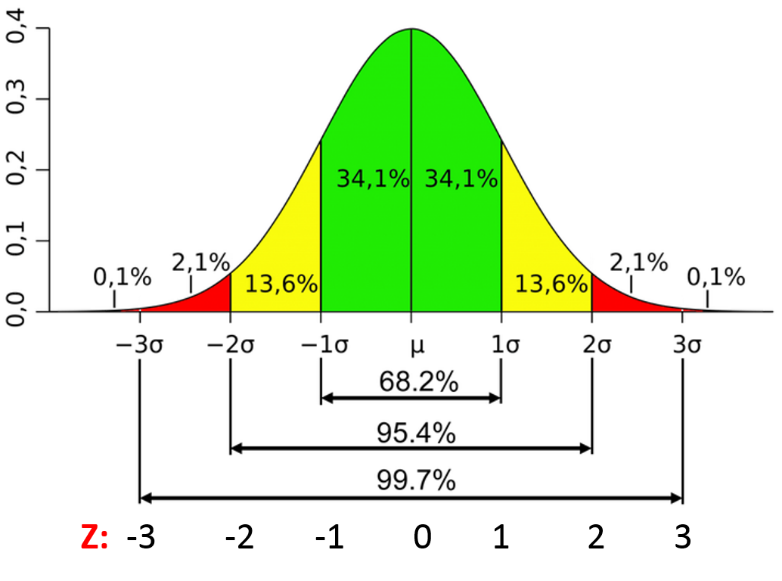

#### Shuffle the order of the elementa in a tensor
* We do shuffling to put changes in sample, and keeping the total amount of data same. **So the inherit order does not affect the learning.**

In [32]:
not_shuffled = tf.constant([[1,2,3],
                            [4,5,6],
                            [7,8,9]])
print(not_shuffled.ndim) #2
print(not_shuffled) #shape = (3,2)

2
tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


`tf.random.shuffle(value, seed=None, name=None)`

In [33]:
shuffled_tensor = tf.random.shuffle(not_shuffled, seed = 11)
print(shuffled_tensor.ndim)
print()
print(shuffled_tensor) # Shape is changed

2

tf.Tensor(
[[7 8 9]
 [4 5 6]
 [1 2 3]], shape=(3, 3), dtype=int32)


In [34]:
# Setting a global seed; To have a good data reproducibility
tf.random.set_seed(69)

suf_1 = tf.random.shuffle(random_1)
print(random_1)
print()
print(suf_1)

tf.Tensor(
[[-0.29604465 -0.21134205]
 [ 0.01063002  1.5165398 ]
 [ 0.27305737 -0.29925638]], shape=(3, 2), dtype=float32)

tf.Tensor(
[[-0.29604465 -0.21134205]
 [ 0.01063002  1.5165398 ]
 [ 0.27305737 -0.29925638]], shape=(3, 2), dtype=float32)


#### Different way of creating a tensor 

In [35]:
# tensor of ones
tf.ones((3,2), tf.float16)

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float16)>

In [36]:
# tensors of zeros
tf.zeros((3,2), tf.float32)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

#### From NumPy array

In [37]:
# Converting from np.array
np_a = np.arange(1, 25)
np_a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [38]:
tf_a = tf.constant(np_a)
tf_a

<tf.Tensor: shape=(24,), dtype=int64, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

In [39]:
np_a.shape

(24,)

In [40]:
3*2*4

24

In [41]:
tf_reshaped = tf.constant(np_a, shape = (3,2,4))
tf_reshaped

<tf.Tensor: shape=(3, 2, 4), dtype=int64, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8]],

       [[ 9, 10, 11, 12],
        [13, 14, 15, 16]],

       [[17, 18, 19, 20],
        [21, 22, 23, 24]]])>

#### Getting inpormation from tensors
* Shape ✅
* Rank
* Axis or Dimension
* Size

In [42]:
# Creating a Rank-4 Tensor
'''
When we say a rank-4 tensor , it means the dimension of tensor is 4
'''
temp = np.ones((2,3))
temp

array([[1., 1., 1.],
       [1., 1., 1.]])

In [43]:
temp.ndim

2

In [44]:
# Rank-4 tensor
tf_temp = tf.ones((2,3,4,5))
tf_temp

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]]], dtype=float32)>

In [45]:
'''
<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([ 
       [ 
           [[1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1.],
           [1., 1., 1., 1., 1.]],
      ---------------------------------
         
        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],
      ----------------------------------
        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],
++++++++++++++++++++++++++++++++++++++++++++++++++
        Part - 2: form ele_1
       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],
    ------------------------------------
        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],
    ---------------------------------------
        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]]
                                ], dtype=float32)>

'''

'\n<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=\narray([ \n       [ \n           [[1., 1., 1., 1., 1.],\n           [1., 1., 1., 1., 1.],\n           [1., 1., 1., 1., 1.],\n           [1., 1., 1., 1., 1.]],\n      ---------------------------------\n         \n        [[1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.]],\n      ----------------------------------\n        [[1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.]]],\n++++++++++++++++++++++++++++++++++++++++++++++++++\n        Part - 2: form ele_1\n       [[[1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.]],\n    ------------------------------------\n        [[1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.],\n         [1., 1., 1., 1., 1.]],\n    ---------------------------------------\n   

In [46]:
print(tf.rank(tf_temp))
print(tf.size(tf_temp))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(120, shape=(), dtype=int32)


#### Function for getting informations out of a tensor:

In [47]:
def details(tensor):
    ''' This is our custom function which gives all the details about a tf.tensor'''
    print("Datatype: ", tensor.dtype)
    print("Rank/ Number of dimension: ", tensor.ndim)
    print("Shape of tensor: ", tensor.shape)
    print("elements along zero axis: ", tensor.shape[0])
    print("Elements along the last axis: ", tensor.shape[-1])
    print("Total number of elements (Almost all visible details): ", tf.size(tensor))
    print("Only the number of element: ", tf.size(tensor).numpy())

In [48]:
details(tf_temp)

Datatype:  <dtype: 'float32'>
Rank/ Number of dimension:  4
Shape of tensor:  (2, 3, 4, 5)
elements along zero axis:  2
Elements along the last axis:  5
Total number of elements (Almost all visible details):  tf.Tensor(120, shape=(), dtype=int32)
Only the number of element:  120


In [49]:
details?

#### Tensor manipualtion

In [50]:
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.29604465, -0.21134205],
       [ 0.01063002,  1.5165398 ],
       [ 0.27305737, -0.29925638]], dtype=float32)>

In [51]:
random_1[:2,:-1]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.29604465],
       [ 0.01063002]], dtype=float32)>

In [52]:
tf_temp

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]]], dtype=float32)>

In [53]:
# 1st two elements
tf_temp[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]],


       [[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]]], dtype=float32)>

In [54]:
# Get 1st element from each dimension from each index
tf_temp[:2,:1,:4,:1]

<tf.Tensor: shape=(2, 1, 4, 1), dtype=float32, numpy=
array([[[[1.],
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         [1.]]]], dtype=float32)>

In [55]:
rank_2 = tf.constant([[1,2,3],
                      [4,5,6]])
rank_2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [56]:
details(rank_2)

Datatype:  <dtype: 'int32'>
Rank/ Number of dimension:  2
Shape of tensor:  (2, 3)
elements along zero axis:  2
Elements along the last axis:  3
Total number of elements (Almost all visible details):  tf.Tensor(6, shape=(), dtype=int32)
Only the number of element:  6


In [57]:
# last element of each row
rank_2[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 6], dtype=int32)>

#### Adding extra dimension to each tensor

In [58]:
# Converting a rank_2 matrix into rank_3 matrix
rank_3 = rank_2[... , tf.newaxis]
rank_3

<tf.Tensor: shape=(2, 3, 1), dtype=int32, numpy=
array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]], dtype=int32)>

In [59]:
rank_4 = rank_3[... , tf.newaxis]
rank_4

<tf.Tensor: shape=(2, 3, 1, 1), dtype=int32, numpy=
array([[[[1]],

        [[2]],

        [[3]]],


       [[[4]],

        [[5]],

        [[6]]]], dtype=int32)>

In [60]:
"""
rank_3 = rank_2[... , tf.newaxis]
                 ^ Why this three dots
"""
temp_rank_4 = rank_3[:, :, :, tf.newaxis]
temp_rank_4

<tf.Tensor: shape=(2, 3, 1, 1), dtype=int32, numpy=
array([[[[1]],

        [[2]],

        [[3]]],


       [[[4]],

        [[5]],

        [[6]]]], dtype=int32)>

As we can see that we can either use :`rank_4 = rank_3[... , tf.newaxis]` <-- Simplified form    
or `temp_rank_4 = rank_3[:, :, :, tf.newaxis]` <--- In this case we hane to use `:`  for each dimension; in rank3 or rank4 tensor; this is not a huge deal but in rank25...... well things can get messy.

In [61]:
rank_5 = rank_4[... , tf.newaxis]
rank_5

<tf.Tensor: shape=(2, 3, 1, 1, 1), dtype=int32, numpy=
array([[[[[1]]],


        [[[2]]],


        [[[3]]]],



       [[[[4]]],


        [[[5]]],


        [[[6]]]]], dtype=int32)>

#### Alternative to `tf.newaxis`

In [62]:
rank_2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [63]:
# Expansion @ axis 0
tf.expand_dims(rank_2, axis = 0)

<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6]]], dtype=int32)>

In [64]:
# Expand dims @ axis -1
tf.expand_dims(rank_2, axis = -1)

<tf.Tensor: shape=(2, 3, 1), dtype=int32, numpy=
array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]], dtype=int32)>

#### Tensor operations:
**Basic Operations:**
`+` `-` `*` `/`

In [65]:
tensor = tf.ones((3,2))
tensor 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [66]:
# Addition
add = tensor+2
add

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[3., 3.],
       [3., 3.],
       [3., 3.]], dtype=float32)>

In [67]:
# Subtraction
tensor-2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-1., -1.],
       [-1., -1.],
       [-1., -1.]], dtype=float32)>

In [68]:
# Multiplication
tensor *2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.],
       [2., 2.]], dtype=float32)>

In [69]:
# Divison
tensor/2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]], dtype=float32)>

***Using built-in function:***
* all these operation is element wise operation

In [70]:
tf.multiply(tensor, 10)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[10., 10.],
       [10., 10.],
       [10., 10.]], dtype=float32)>

In [71]:
temp = tf.constant((np.arange(1,7)),shape = (3,2), dtype = tf.float32)
temp

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

In [72]:
tf.multiply(tensor+2, temp)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 3.,  6.],
       [ 9., 12.],
       [15., 18.]], dtype=float32)>

In [73]:
tf.add(tensor/2, temp)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1.5, 2.5],
       [3.5, 4.5],
       [5.5, 6.5]], dtype=float32)>

In [74]:
temp = tf.constant((np.arange(1,7)),shape = (3,2), dtype = tf.float32)
temp

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

In [75]:
tf.subtract(temp, tensor)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

In [76]:
tf.divide(tensor, temp)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1.        , 0.5       ],
       [0.33333334, 0.25      ],
       [0.2       , 0.16666667]], dtype=float32)>

#### 💠 Matrix Multiplication

In [77]:
mul_a = tf.constant([[1,2,3],
                     [4,5,6],
                     [7,8,9]], tf.float32)
mul_b = tf.constant([[2,5], [6,7], [1,8]], tf.float32)
print(mul_a)
print(mul_b)
print(tf.matmul(mul_a, mul_b))

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[2. 5.]
 [6. 7.]
 [1. 8.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[ 17.  43.]
 [ 44. 103.]
 [ 71. 163.]], shape=(3, 2), dtype=float32)


Animation of a Matrix Multiplication:   
📌***link:*** http://matrixmultiplication.xyz/

In [78]:
#mul_a*mul_b # |<--- As it is element wise, the shape has to be same.

In [79]:
mul_a @ mul_b # @ symbol represents the matrix multiplication 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 17.,  43.],
       [ 44., 103.],
       [ 71., 163.]], dtype=float32)>

#### Reshape function

In [80]:
mul_b

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[2., 5.],
       [6., 7.],
       [1., 8.]], dtype=float32)>

In [81]:
tf.reshape(mul_b, shape = (2,3))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[2., 5., 6.],
       [7., 1., 8.]], dtype=float32)>

In [82]:
tf.reshape(mul_b, shape = (2,3)) @ tf.reshape(mul_b, shape = (3,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 40.,  93.],
       [ 28., 106.]], dtype=float32)>

#### Transpose 

In [83]:
mul_b, tf.transpose(mul_b), tf.reshape(mul_b, shape = (3,2))

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[2., 5.],
        [6., 7.],
        [1., 8.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[2., 6., 1.],
        [5., 7., 8.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[2., 5.],
        [6., 7.],
        [1., 8.]], dtype=float32)>)

In [84]:
mul_b

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[2., 5.],
       [6., 7.],
       [1., 8.]], dtype=float32)>

**Transpose:** Means reshaping the axis

**Reshape:** Means reshufling

#### dot product:
Matrix Multiplication is also known as the dotproduct. We can use `tf.tensordot()` inplace of `tf.matmul()` for calculation of the matrix multiplaication.

In [85]:
mul_b

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[2., 5.],
       [6., 7.],
       [1., 8.]], dtype=float32)>

In [86]:
# performing dot product on X and Y (Requires X or the Y to be transposed)
tf.tensordot(tf.transpose(mul_b), mul_b, axes = 1)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 41.,  60.],
       [ 60., 138.]], dtype=float32)>

In [87]:
tf.tensordot(tf.transpose(mul_b), mul_b, axes = 0)

<tf.Tensor: shape=(2, 3, 3, 2), dtype=float32, numpy=
array([[[[ 4., 10.],
         [12., 14.],
         [ 2., 16.]],

        [[12., 30.],
         [36., 42.],
         [ 6., 48.]],

        [[ 2.,  5.],
         [ 6.,  7.],
         [ 1.,  8.]]],


       [[[10., 25.],
         [30., 35.],
         [ 5., 40.]],

        [[14., 35.],
         [42., 49.],
         [ 7., 56.]],

        [[16., 40.],
         [48., 56.],
         [ 8., 64.]]]], dtype=float32)>

In [88]:
tf.tensordot(mul_b, tf.transpose(mul_b), axes = 0)

<tf.Tensor: shape=(3, 2, 2, 3), dtype=float32, numpy=
array([[[[ 4., 12.,  2.],
         [10., 14., 16.]],

        [[10., 30.,  5.],
         [25., 35., 40.]]],


       [[[12., 36.,  6.],
         [30., 42., 48.]],

        [[14., 42.,  7.],
         [35., 49., 56.]]],


       [[[ 2.,  6.,  1.],
         [ 5.,  7.,  8.]],

        [[16., 48.,  8.],
         [40., 56., 64.]]]], dtype=float32)>

In [89]:
tf.tensordot(mul_b, tf.transpose(mul_b), axes = 1)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[29., 47., 42.],
       [47., 85., 62.],
       [42., 62., 65.]], dtype=float32)>

***Axes of a matrix:***

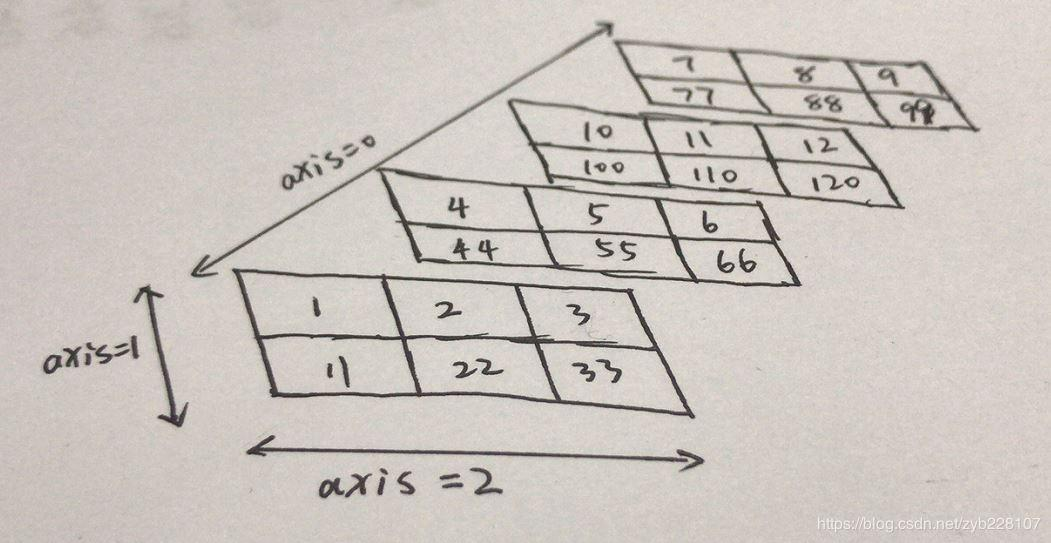

In [90]:
mul_b

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[2., 5.],
       [6., 7.],
       [1., 8.]], dtype=float32)>

#### .reshape() VS .transpose()

In [91]:
Y = tf.constant(np.array([[7, 8],
                          [9, 10],
                          [11, 12]]))
print(Y)

tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int64)


In [92]:
print(Y)
print()


print("Y reshaped to (2,3): ")
print(tf.reshape(Y, (2,3)))
print()

print("Y transposed:")
print(tf.transpose(Y))

tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int64)

Y reshaped to (2,3): 
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int64)

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int64)


* As we can see that in `transpose` ROW --> COLUMN, aka Axis is flipped
* IN `reshape` They just get rearranged according to their order

### Relation b/w Matrix multiplication & dot product

In [93]:
tf.matmul(Y, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[113, 143, 173],
       [143, 181, 219],
       [173, 219, 265]])>

In [94]:
tf.tensordot(Y, tf.transpose(Y), axes = 1)

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[113, 143, 173],
       [143, 181, 219],
       [173, 219, 265]])>

* **These two results the same.**
* We will most of the time end up using `tf.transpose` as it is way better than using `tf.reshape`; During matrix maultiplication (When one of the matrix doesn't lined up with the rest)

### Change the Datatype of the tensors:
* The Default data type of tensorflow is `tf.float32` <---- For float values
* `tf.int32` <---  for integer values

In [95]:
Y
''' When tensor is created from np.array() <---- then defay=ult datatype is int64
as int64 is default for numpy
'''

' When tensor is created from np.array() <---- then defay=ult datatype is int64\nas int64 is default for numpy\n'

In [96]:
c = tf.constant([1,2])
c # As we can see that def datatype is int32

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [97]:
d = np. array([1,2])
d.dtype

dtype('int64')

In [98]:
f = tf.constant([1.1, 2., 3.])
f # Def datatype is float32

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.1, 2. , 3. ], dtype=float32)>

***Normal data type and tensorflow datatypes are not same; `tf.float32 != float32`; from python. Similarly `tf.int32 != int32`***

In [99]:
tf.__version__

'2.4.1'

* In this version defaults are given above; might change in future `tf.__version__ == 2.4.1`

##### Reduced Precision: (Eg.==> Downgrading from  32bits ---> 16bits) 
* 📌Mixed Precision:- https://www.tensorflow.org/guide/mixed_precision
>> * Mixed precision is the use of both 16-bit and 32-bit floating-point types in a model during training to make it run faster and use less memory. By keeping certain parts of the model in the 32-bit types for numeric stability, the model will have a lower step time and train equally as well in terms of the evaluation metrics such as accuracy. This guide describes how to use the Keras mixed precision API to speed up your models. Using this API can improve performance by more than 3 times on modern GPUs and 60% on TPUs.

Today, most models use the float32 dtype, which takes 32 bits of memory. However, there are two lower-precision dtypes, float16 and bfloat16, each which take 16 bits of memory instead. Modern accelerators can run operations faster in the 16-bit dtypes, as they have specialized hardware to run 16-bit computations and 16-bit dtypes can be read from memory faster.

NVIDIA GPUs can run operations in float16 faster than in float32, and TPUs can run operations in bfloat16 faster than float32. Therefore, these lower-precision dtypes should be used whenever possible on those devices. However, variables and a few computations should still be in float32 for numeric reasons so that the model trains to the same quality. The Keras mixed precision API allows you to use a mix of either float16 or bfloat16 with float32, to get the performance benefits from float16/bfloat16 and the numeric stability benefits from float32.

In [100]:
B = tf.cast(f, dtype = tf.float16)
print("B: ")
print(B)

print()
print("f: ")
print(f)

B: 
tf.Tensor([1.1 2.  3. ], shape=(3,), dtype=float16)

f: 
tf.Tensor([1.1 2.  3. ], shape=(3,), dtype=float32)


In [101]:
# Conversion from int --> float and viceversa
print(f)
print()
i = tf.cast(f, dtype = tf.int64)
print(i)

tf.Tensor([1.1 2.  3. ], shape=(3,), dtype=float32)

tf.Tensor([1 2 3], shape=(3,), dtype=int64)


### Additional content: Numba api⚡⚡⚡

In [102]:
import time
from numba import jit

In [103]:
import random

In [104]:
@jit(nopython=True)
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [105]:
%%time
monte_carlo_pi(200)

CPU times: user 472 ms, sys: 25.8 ms, total: 498 ms
Wall time: 543 ms


2.86

In [106]:
# Normal
def normal_monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [107]:
%%time
normal_monte_carlo_pi(200)

CPU times: user 159 µs, sys: 0 ns, total: 159 µs
Wall time: 166 µs


3.16

##### MAtrix Multiplication

In [108]:
@jit(nopython=True)
def using_numba(a, b):
    return np.dot(a,b)    

In [109]:
a = np.random.rand(200,200)
b = np.random.rand(200,200)

In [110]:
start = time.time()
using_numba(a,b)
end = time.time()
fast_numba = (end-start)

In [111]:
def using_numpy_only(a, b):
    return np.dot(a,b)

In [112]:
np_start = time.time()
using_numpy_only(a,b)
np_end = time.time()

In [113]:
fast_np = np_end - np_start
speed_diff = fast_np - fast_numba
speed_diff

-0.40328073501586914

**For some unknown reasons matrix multiplication or `.matmul()` is not working**

### Aggregating tensors
* Condensing them from multiple values down to a smaller amount of values.

In [114]:
# Get the absolute value
a = tf.constant([-10, -20, -30])
a_abs = tf.abs(a)
a, a_abs

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([-10, -20, -30], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([10, 20, 30], dtype=int32)>)

***Different types of Tensor Aggregation:***
* Get minimum
* Get maximum
* Get the mean of the tensors
* Sum of the tensors

In [115]:
e = tf.constant(np.random.randint(0, 100, size = 50))
e

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([92,  5, 78, 78, 70, 36, 29, 44, 61, 93, 89, 61,  4, 28, 88, 97, 45,
       27,  3, 53, 30, 76, 52, 16,  9, 15,  1, 22, 79, 49, 16, 45, 53, 83,
       46, 30, 86, 28,  5, 83, 95, 43,  1, 39, 86, 66, 43, 56, 48, 93])>

In [116]:
e_np = e.numpy()
e_np

array([92,  5, 78, 78, 70, 36, 29, 44, 61, 93, 89, 61,  4, 28, 88, 97, 45,
       27,  3, 53, 30, 76, 52, 16,  9, 15,  1, 22, 79, 49, 16, 45, 53, 83,
       46, 30, 86, 28,  5, 83, 95, 43,  1, 39, 86, 66, 43, 56, 48, 93])

***Find the minimum***

In [117]:
# In numpy
np.min(e)

1

In [118]:
# in TensorFlow -----> (@ the end,  numpy = .....(Some Value) )
tf.reduce_min(e) 

<tf.Tensor: shape=(), dtype=int64, numpy=1>

***Find the MAximum***

In [119]:
np.max(e)

97

In [120]:
tf.reduce_max(e)

<tf.Tensor: shape=(), dtype=int64, numpy=97>

***Find the reduced mean***

In [121]:
np.mean(e)

49.5

In [122]:
tf.reduce_mean(e) # serves int value; more specifically floor version of int value.

<tf.Tensor: shape=(), dtype=int64, numpy=49>

### Exercise: Find the standard deviation and the Variance of the tensors.
* link = https://byjus.com/maths/difference-between-variance-and-standard-deviation/

In [123]:
# Standard Deviation
def std_dev(a):
    # tf.cast(a, dtype = tf.int32)
    return np.sqrt((np.sum((a-np.mean(a)))**2)/np.size(a))

In [124]:
a = std_dev(e)
a

3.5355339059327378

In [125]:
# Variance
def variance(a):
    return np.sqrt((np.sum((a-np.mean(a)))**2)/np.size(a)-1)

In [126]:
variance(e)

3.391164991562634

In [127]:
import tensorflow_probability as tfp

In [128]:
# Variance
tfp.stats.variance(e)

<tf.Tensor: shape=(), dtype=int64, numpy=878>

In [129]:
# Standard Deviation
tf.math.reduce_std(tf.cast(e, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=29.630558>

Without using `tensorflow.probability` library

In [132]:
tf.math.reduce_std(tf.cast(e, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=29.630558>

In [133]:
tf.math.reduce_variance(tf.cast(e, dtype= tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=877.97>

### Find the positional Minimum and Maximum

In [134]:
# The Tensor 
e

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([92,  5, 78, 78, 70, 36, 29, 44, 61, 93, 89, 61,  4, 28, 88, 97, 45,
       27,  3, 53, 30, 76, 52, 16,  9, 15,  1, 22, 79, 49, 16, 45, 53, 83,
       46, 30, 86, 28,  5, 83, 95, 43,  1, 39, 86, 66, 43, 56, 48, 93])>

In [135]:
# The index of the max value
tf.argmax(e) # Returns the index with the largest value across axes of a tensor.

<tf.Tensor: shape=(), dtype=int64, numpy=15>

In [136]:
tf.reduce_max(e)

<tf.Tensor: shape=(), dtype=int64, numpy=97>

In [137]:
# The index of min value
tf.argmin(e), tf.reduce_min(e)

(<tf.Tensor: shape=(), dtype=int64, numpy=26>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>)

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([92,  5, 78, 78, 70, 36, 29, 44, 61, 93, 89, 61,  4, 28, 88, `97`, 45,
       27,  3, 53, 30, 76, 52, 16,  9, 15,  `1`, 22, 79, 49, 16, 45, 53, 83,
       46, 30, 86, 28,  5, 83, 95, 43,  1, 39, 86, 66, 43, 56, 48, 93])>

In [140]:
# Lets assert these statement
e[tf.argmax(e)] == tf.reduce_max(e)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [141]:
e[tf.argmin(e)] == tf.reduce_min(e)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### 💠 Squzeeing a tensor(Removing all single dimensions)

In [143]:
tf.random.set_seed(7)
g = tf.constant(tf.random.uniform(shape = [50] ), shape = (1,1,1,50))
g

<tf.Tensor: shape=(1, 1, 1, 50), dtype=float32, numpy=
array([[[[0.8344538 , 0.23336661, 0.8796519 , 0.04664922, 0.80349684,
          0.9420098 , 0.48560476, 0.9596517 , 0.65881574, 0.11269152,
          0.42992353, 0.60388005, 0.09393823, 0.08232665, 0.87509394,
          0.9595978 , 0.24487329, 0.4698069 , 0.7515631 , 0.83605003,
          0.8556993 , 0.30181408, 0.82694066, 0.49390066, 0.63653564,
          0.29243422, 0.9494889 , 0.5301058 , 0.1835326 , 0.58373356,
          0.89675355, 0.5347773 , 0.29837036, 0.07734811, 0.17663229,
          0.3444836 , 0.4229324 , 0.68379617, 0.4887246 , 0.5376346 ,
          0.91624343, 0.33474946, 0.06718647, 0.84025824, 0.6102561 ,
          0.1546061 , 0.23240829, 0.7687037 , 0.5492232 , 0.54143226]]]],
      dtype=float32)>

In [144]:
g.ndim

4

In [145]:
details(g)

Datatype:  <dtype: 'float32'>
Rank/ Number of dimension:  4
Shape of tensor:  (1, 1, 1, 50)
elements along zero axis:  1
Elements along the last axis:  50
Total number of elements (Almost all visible details):  tf.Tensor(50, shape=(), dtype=int32)
Only the number of element:  50


In [147]:
# Removes dimensions of size 1 from the shape of a tensor.
g_squeezed = tf.squeeze(g)
g_squeezed

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.8344538 , 0.23336661, 0.8796519 , 0.04664922, 0.80349684,
       0.9420098 , 0.48560476, 0.9596517 , 0.65881574, 0.11269152,
       0.42992353, 0.60388005, 0.09393823, 0.08232665, 0.87509394,
       0.9595978 , 0.24487329, 0.4698069 , 0.7515631 , 0.83605003,
       0.8556993 , 0.30181408, 0.82694066, 0.49390066, 0.63653564,
       0.29243422, 0.9494889 , 0.5301058 , 0.1835326 , 0.58373356,
       0.89675355, 0.5347773 , 0.29837036, 0.07734811, 0.17663229,
       0.3444836 , 0.4229324 , 0.68379617, 0.4887246 , 0.5376346 ,
       0.91624343, 0.33474946, 0.06718647, 0.84025824, 0.6102561 ,
       0.1546061 , 0.23240829, 0.7687037 , 0.5492232 , 0.54143226],
      dtype=float32)>

In [149]:
g_squeezed.shape # All the rank tensors have been removed 

TensorShape([50])

### 💠 One-hot Encoding
* One hot encoding is the most widespread approach, and it works very well unless your categorical variable takes on a large number of values (i.e. you generally won't it for variables taking more than 15 different values. It'd be a poor choice in some cases with fewer values, though that varies.)

* One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data. Let's work through an example.

* The values in the original data are Red, Yellow and Green. We create a separate column for each possible value. Wherever the original value was Red, we put a 1 in the Red column.
link -- https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding
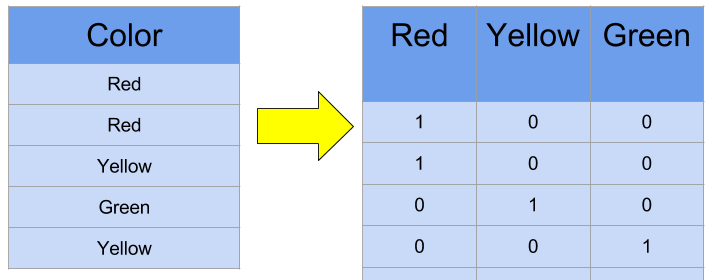

In [150]:
# Sample Code:-

# Created a list of indices
some_list = [0,1,2,3,4] # Could be categorical vars

# Applying One-hot Encoder
tf.one_hot(some_list, depth = 5)


<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [151]:
# Lets change depth parameter
tf.one_hot(some_list, depth = 2)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

***If the depth is != number of unique values, that need to be encoded; Then the output matrix will be shrinked***

**Using  `on_value`  parameter**

In [165]:
tf.one_hot(some_list, depth = 5, on_value= "++++", off_value= "----")

<tf.Tensor: shape=(5, 5), dtype=string, numpy=
array([[b'++++', b'----', b'----', b'----', b'----'],
       [b'----', b'++++', b'----', b'----', b'----'],
       [b'----', b'----', b'++++', b'----', b'----'],
       [b'----', b'----', b'----', b'++++', b'----'],
       [b'----', b'----', b'----', b'----', b'++++']], dtype=object)>

With this we can even generate non-binary value ***JUST FOR FUN!!!***

In [166]:
'''color_list = ["red", "blue", "green", "yellow", "grey"]
tf.one_hot(color_list, depth = 5)'''

'color_list = ["red", "blue", "green", "yellow", "grey"]\ntf.one_hot(color_list, depth = 5)'

### Additional Math Functions

In [167]:
h = tf.range(50)
h

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)>

In [168]:
# Square
tf.square(h)

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401], dtype=int32)>

In [170]:
h # tf.square is not a inplace function

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)>

In [171]:
# Square Root
tf.sqrt(tf.cast(h, dtype = tf.float32))

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.        , 0.99999994, 1.4142134 , 1.7320508 , 1.9999999 ,
       2.236068  , 2.4494896 , 2.6457512 , 2.8284268 , 2.9999998 ,
       3.1622777 , 3.3166244 , 3.4641016 , 3.6055508 , 3.7416573 ,
       3.8729832 , 3.9999998 , 4.1231055 , 4.2426405 , 4.3588986 ,
       4.472136  , 4.5825753 , 4.6904154 , 4.795831  , 4.898979  ,
       5.        , 5.0990195 , 5.196152  , 5.2915025 , 5.3851647 ,
       5.477226  , 5.5677643 , 5.6568537 , 5.744562  , 5.830951  ,
       5.9160795 , 5.9999995 , 6.0827622 , 6.164414  , 6.244997  ,
       6.3245554 , 6.4031243 , 6.4807405 , 6.557438  , 6.633249  ,
       6.7082043 , 6.78233   , 6.8556547 , 6.928203  , 7.        ],
      dtype=float32)>

In [173]:
# Log
tf.math.log(tf.cast(h, dtype = tf.float32))

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([     -inf, 0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 ,
       1.7917595, 1.9459102, 2.0794415, 2.1972246, 2.3025851, 2.3978953,
       2.4849067, 2.5649493, 2.6390574, 2.7080503, 2.7725887, 2.8332133,
       2.8903718, 2.944439 , 2.9957323, 3.0445225, 3.0910425, 3.1354942,
       3.1780539, 3.218876 , 3.2580965, 3.295837 , 3.3322046, 3.3672957,
       3.4011974, 3.4339871, 3.465736 , 3.4965076, 3.5263605, 3.5553482,
       3.583519 , 3.6109178, 3.637586 , 3.6635616, 3.6888795, 3.713572 ,
       3.7376697, 3.7612002, 3.7841897, 3.8066626, 3.8286414, 3.8501477,
       3.871201 , 3.8918202], dtype=float32)>

### Tensors and numpys